In [16]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [17]:

X = sorted(glob('/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/images/*.tif'))
Y = sorted(glob('/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/masks/*.tif'))

targetdirX = '/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/images/'
targetdirY = '/Users/aimachine/Documents/JuliaData/Julia/LabKitLabelling/masks/'

assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))
Names = []

axes = 'XY'
print(os.path.split(X[0])[-1])


1.tif


In [18]:
listX = list(map(imread,X))
listY = list(map(imread,Y))

In [19]:

#Concactenate into an array

rankthreeX = np.zeros((len(listX), listX[0].shape[0], listX[0].shape[1]),dtype = float)
rankthreeY = np.zeros((len(listY), listY[0].shape[0], listY[0].shape[1]),dtype = float)

arraysX, arraysY = [listX[i] for i in range(len(listX))] , [listY[i] for i in range(len(listY))] 
   
  
rankthreeX = np.stack(arraysX, axis = 0)
rankthreeY = np.stack(arraysY, axis = 0)

rankfourX = np.expand_dims(rankthreeX, axis = -1)
rankfourY = np.expand_dims(rankthreeY, axis = -1)

print(rankfourX.shape)

(18, 512, 512, 1)


In [20]:
from keras.preprocessing.image import ImageDataGenerator

# traning data is augmented
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

train_generator = train_datagen.flow(rankfourX, rankfourY,
    batch_size=200)

In [21]:
newX,newY = train_generator.next()
print(newX.shape)

(18, 512, 512, 1)


In [22]:



for i in range(newX.shape[0]):
      resultX = newX[i,:,:,0]
       
     
      base = os.path.split(X[i])[-1]
      
      Filename = "new" + base
      
      save_tiff_imagej_compatible((targetdirX + Filename ) , resultX, axes)
        
for i in range(newY.shape[0]):
      resultY = newY[i,:,:,0]
      base = os.path.split(Y[i])[-1]

      Filename = "new" + base
     
      save_tiff_imagej_compatible((targetdirY + Filename ) , resultY, axes)        

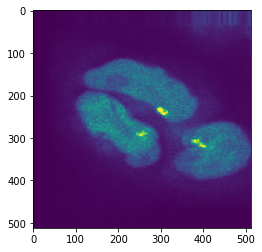

In [23]:
plt.imshow(resultX)

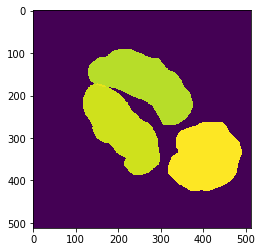

In [24]:
plt.imshow(resultY)